<a href="https://colab.research.google.com/github/mccoy0928/pandas_dataframe/blob/main/20230807_myLTScut34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20230807 新增cut34排列統計
* 將excel資料原由"34\*80轉換成68\*40",近似JPT量測數據

# 20230803 update

# 練習myData圖形繪製

## 20230729 use seaborn 製作直方圖+KDE



In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [129]:
# from google.colab import drive
# drive.mount('/content/drive')

## 資料讀取轉換

In [130]:
myfile = "LTSdata2.xlsx"  # 請變更讀取檔名 xlsx
df = pd.read_excel(myfile, sheet_name = "工作表1")


In [131]:
# df2 = pd.read_excel(myfile, sheet_name = "工作表1", usecols="B:CC")  #讀取欄位名only 針對熱力圖所需
row1To40 = pd.read_excel(myfile, sheet_name='工作表1',usecols='B:AO') # 原有80rows分前後個讀取40rows
row41To80 = pd.read_excel(myfile, sheet_name='工作表1',usecols='AP:CC')
# df2.head()

In [132]:
# row41To80
recolumnsName=row1To40.columns[:]    # 置換row41~80 變成row1~40
row41To80.columns=recolumnsName


In [133]:
# row41To80

In [134]:
# len(row1To40)
# row1To40

# 插入特殊index

* #********************************************
# Inserting a Row at a Specific Index
# df.loc[1.5] = ['Jane', 25, 'Madrid']
# df = df.sort_index().reset_index(drop=True)
#********************************************

In [135]:
for i in row1To40.columns[:]:
  for j in range(int(len(row41To80))):
    row1To40.loc[j+0.5,i]=row41To80.loc[j,i]    # 重新將後半部資料依照間隔插入
row1To40=row1To40.sort_index().reset_index(drop=True)      # 將index重置排列

In [136]:
myList = np.array(row1To40)
df2 = row1To40
df3 = row1To40.dropna()

# myList
# myList.shape

## 熱力圖

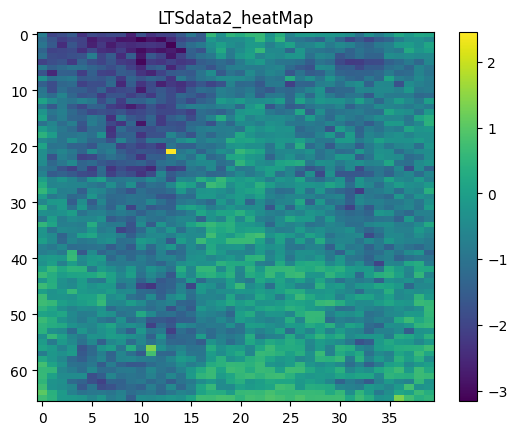

In [137]:
# 創建熱力圖
figName = myfile[:-5] +'_heatMap.jpg'
plt.imshow(df3, cmap='viridis', origin='upper', aspect='auto')

# 添加顏色欄圖示
plt.title(figName[:-4])
plt.colorbar()

# 顯示圖形
plt.title(figName[:-4])
plt.savefig(figName)
plt.show()


In [138]:
#df.iloc[:, 0]

In [139]:
# 維度轉換 範例
# 二維陣列
# two_dim_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# # 使用 flatten() 方法
# one_dim_array_flatten = two_dim_array.flatten()

# # 使用 ravel() 方法
# one_dim_array_ravel = two_dim_array.ravel()

## 繪製分佈圖

```
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

sales = [100,80,50]
x_labels = ['A','B','C']
sales_pos = [0,1,5]
plt.title('我的標題')
plt.xlabel('銷售品項')
plt.ylabel('銷售量')
plt.bar(sales_pos,sales)
plt.xticks(sales_pos,x_labels)
plt.show()
```

In [140]:
temp = np.array(df3)
x = temp.flatten()  # 二維轉換一維
# 20230730 改用 seaborn 繪製hist分佈圖直方圖
# 繪製分佈圖

# plt.hist(x, bins=20, edgecolor='y')
# # plt.hist(x, bins='auto', edgecolor='y')
# plt.xlabel('Total %')
# plt.ylabel('PCS')
# plt.title('distribution')
# plt.show()

* seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

[Seaborn API](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [141]:
# myfile[:-5]

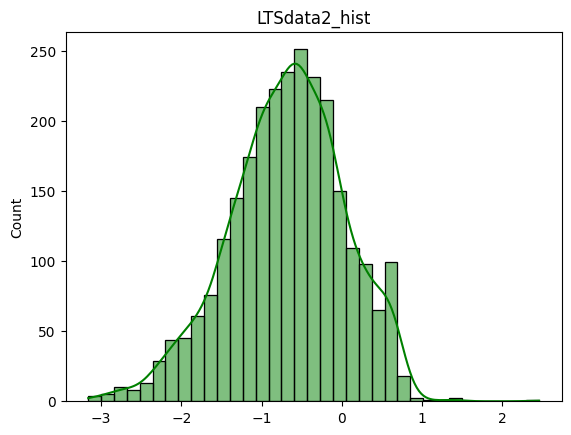

In [142]:
# 20230730 *********************
import seaborn as sns
figName = myfile[:-5] + '_hist.jpg'
# import numpy as np
# x = np.random.normal(size=2000)
# sns.distplot(x)
# myFig = sns.histplot(x, bins=35, color='green', kde=True).set_xlim(-3, 1) # kde曲線
myFig = sns.histplot(x, bins=35, color='green', kde=True).set(title=figName[:-4])
plt.savefig(figName)




## 趨勢圖


* 均值
  * np.mean(nums)
* 中位数
  * np.median(nums)

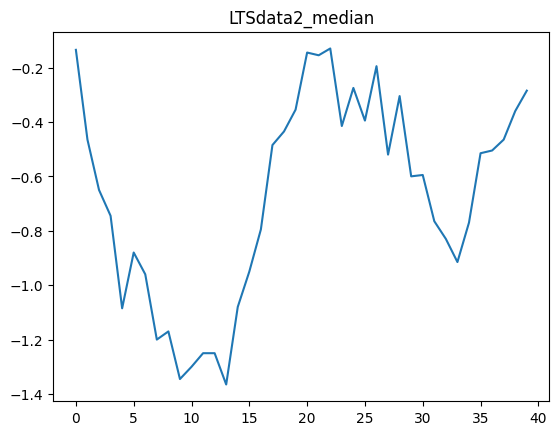

In [143]:
# import numpy
# from matplotlib import pyplot as plt
df3 = df2.dropna()  # 剔除dataframe空值
figName = myfile[:-5] + '_median.jpg'
# a = df
b = []
for i in df3:
  #mean = np.mean(df2[i])
  mean = np.median(df3[i])
  b.append(mean)

# Plot the Data itself.
plt.title(figName[:-4])
plt.plot(b)
plt.savefig(figName)
plt.show()


## R1~R68 良率%


In [144]:
# 設定各Row上下限標準 依照中位數為準
bUp = []
bDn = []
allCenter = np.median(df3)
for i in df3.columns :
  #mean = np.mean(df2[i])
  meanUp = np.median(df3[i]) + 0.8
  meanDn = np.median(df3[i]) - 0.8
  bUp.append(meanUp)
  bDn.append(meanDn)


### 計算中位數

In [145]:
print('全部數據中位數:', allCenter)

全部數據中位數: -0.64


In [146]:
# print(df3.columns)

# print(bUp)
# print(b)
# print(bDn)
# # print(b)
# # for i in range(len(df3)):
# #   print(df3.iat[i, 0])

# q = len(df3['Row 1'])
# w = bUp[0]
# e = bDn[0]
# print(q, w, e)

### 計算良品數

In [147]:
# df2.at[35, 'Row 1']

In [148]:
from numpy.ma import count
Rows = df2.columns
# print(len(Rows))
# countAll = count(df2)
nogoodCount = 0
goodCount = 0
# countHi = 0
# countLo = 0
# yieldList = []
r_num = 0
for k in Rows:
  # print(k)
  for i in range(len(df2)):
    # print(df2.at[i, k])
    # 20230730 add Hi & Lo **********
    # if df2.at[i, k] > 4 :
    #   countHi += 1
    # if df2.at[i, k] < -8 :
    #   countLo += 1
# 20230730 1st. way ***********************
    # if df2.at[i, k] <= bUp[r_num] and df2.at[i, k] >= bDn[r_num]:
    #   goodCount += 1
    # if df2.at[i, k] > bUp[r_num] or df2.at[i, k] < bDn[r_num]:  # 依照各Row中位數 +/- 0.8 做上下限
    #   nogoodCount += 1
# 20230730 採用全體中位數做計算 2nd. way *******************
    if df2.at[i, k] <= (allCenter+0.8) and df2.at[i, k] >= (allCenter-0.8):
      goodCount += 1
    if df2.at[i, k] > (allCenter+0.8) or df2.at[i, k] < (allCenter-0.8):  # 依照中位數 +/- 0.8 做上下限
      nogoodCount += 1
# 20230730 *****************************************
  r_num += 1
countAll = goodCount + nogoodCount
# 計算量測空值 sum null numbers 20230730 *******************
nanum = df2.isna().sum()
naN = 0
for i in nanum:
  if i == True:
    naN += 1
# print(naN)
# **********************************************
print("不良品數: ", nogoodCount)
print("良品數: ", goodCount)
print("Probe error: ", naN)
print("基板有效量測數: ", countAll)
# print("Yield %: {:.2%}".format((countAll-nogoodCount) / countAll) )
totalYield = (countAll-nogoodCount) / countAll
print(f"Yield %: {totalYield:.2%}")



不良品數:  710
良品數:  2008
Probe error:  2
基板有效量測數:  2718
Yield %: 73.88%


In [149]:
# 計算標準差std
stdAverge = np.std(x)
# print("sd: {:.3f}".format(stdAverge))
print(f'sd: {stdAverge:.3f}')

sd: 0.719


In [150]:
txtName = myfile[:-4] + 'txt'
f = open(txtName, 'w')
print("不良品數: ", nogoodCount, file=f)
print("良品數: ", goodCount, file=f)
print("Probe error: ", naN, file=f)
print("基板有效量測數: ", countAll, file=f)
# totalYield = (countAll-nogoodCount) / countAll
print(f"Yield %: {totalYield:.2%}", file=f)
print(f'sd: {stdAverge:.3f}', file=f)
f.close()

In [151]:
myOutputTxt = {
    "不良品數:": nogoodCount,
    "良品數: ": goodCount,
    "Probe error: ": naN,
    "基板有效量測數:": countAll,
    "Yield %:":totalYield,
    "SD :":stdAverge

}

In [152]:
myOutputTxt

{'不良品數:': 710,
 '良品數: ': 2008,
 'Probe error: ': 2,
 '基板有效量測數:': 2718,
 'Yield %:': 0.7387785136129507,
 'SD :': 0.7191581644884456}

In [153]:
# df2.shape

### 繪製Row 良率圖表

[52, 46, 57, 55, 48, 49, 47, 44, 51, 51, 44, 52, 53, 51, 51, 55, 53, 49, 56, 59, 60, 64, 61, 55, 58, 50, 53, 55, 56, 56, 53, 60, 55, 59, 62, 59, 58, 59, 56, 59]


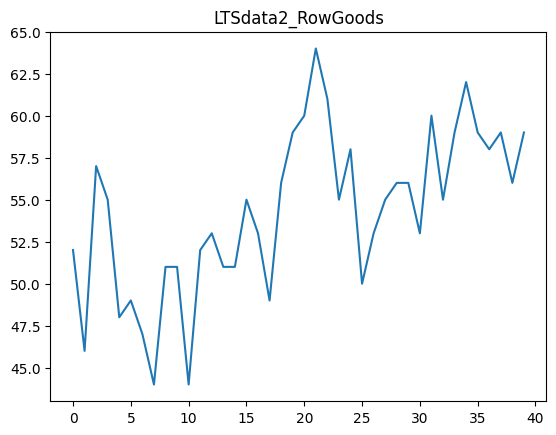

In [154]:
# 利用迴圈計數存入每一Row List
yieldCount = 0
yieldList = []
figName = myfile[:-5] + '_RowGoods.jpg'
rowCount = 0
r_num = 0

for k in Rows:
  # print(k)
  for i in range(len(df2)):
    # print(df2.at[i, k])
    if df2.at[i, k] <= bUp[r_num] and df2.at[i, k] >= bDn[r_num]:  # 依照中位數 +/- 0.8 做上下限
       yieldCount += 1

  yieldList.append(yieldCount)


  yieldCount = 0
  rowCount = 0
  r_num += 1

print(yieldList)
plt.title(figName[:-4])
plt.plot(yieldList)
plt.savefig(figName)
plt.show()

[ 76.5%  67.6%  83.8%  80.9%  70.6%  72.1%  69.1%  64.7%  75.0%  75.0%
  64.7%  76.5%  77.9%  75.0%  75.0%  80.9%  77.9%  72.1%  82.4%  86.8%
  88.2%  94.1%  89.7%  80.9%  85.3%  73.5%  77.9%  80.9%  82.4%  82.4%
  77.9%  88.2%  80.9%  86.8%  91.2%  86.8%  85.3%  86.8%  82.4%  86.8%]


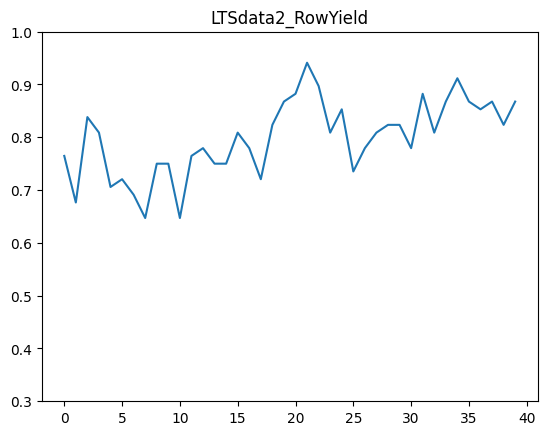

In [155]:
figName = myfile[:-5] + '_RowYield.jpg'
rowlist = np.array([68])
newrowyield = yieldList / rowlist
np.set_printoptions(formatter={'float': '{: 0.1%}'.format})
print(newrowyield)
plt.ylim(0.3,1)
plt.title(figName[:-4])
plt.plot(newrowyield)
plt.savefig(figName)
plt.show()

In [156]:
myfile

'LTSdata2.xlsx'

In [162]:
from google.colab import files
newfileName = myfile[:-5]
iName = ['.txt', '_hist.jpg', '_heatMap.jpg', '_median.jpg', '_RowGoods.jpg', '_RowYield.jpg']
for i in iName:
  downName = newfileName + i
  files.download(downName)
  # print(downName)

# print(newfileName + iName[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
# len(yieldList)

In [159]:
# df3 = df2.dropna()  # 剔除dataframe空值

# # Plot the Data itself.
# plt.plot(df3)

# plt.show()




# 網路舉例

```

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

```

In [160]:
# from pandas._libs.algos import diff_2d
# ChatGPT 產生code
# import numpy as np
# import matplotlib.pyplot as plt


# # 產生範例資料，這裡使用了隨機的二維NumPy陣列
# #data = np.random.randint(1, 10, size=(4, 3))  # 產生一個 4x3 的二維陣列，數值範圍在 1 到 10 之間
# data = myList
# # 設置長條圖參數
# #rows = ['Row 1', 'Row 2', 'Row 3', 'Row 4']  # 每一列的標籤
# rows = df.iloc[:, 0]

# # columns = ['A', 'B', 'C']  # 每一行的標籤
# columns = df2.columns.tolist()


# # 建立長條圖
# fig, ax = plt.subplots()
# width = 0.2  # 設置每個長條的寬度
# x = np.arange(len(columns))


# for i, row in enumerate(data):
#     ax.bar(x + i * width, row, width, label=rows[i])

# # 加入標籤和圖例
# ax.set_ylabel('%')
# ax.set_title(' Row offset')
# #ax.set_xticks(x + width * (len(data) - 1) / 2)
# #ax.set_xticklabels(columns)
# # ax.legend()

# # 顯示圖形
# plt.show()
